<a href="https://colab.research.google.com/github/rashettycode/UofT_DSI/blob/main/DSI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install google_colab_shell
from google_colab_shell import getshell

getshell()

In [3]:
import requests
import json
from pprint import pprint

# get secret from Colab
from google.colab import userdata
token = userdata.get('ghtoken')

# initialize request parameters
url = 'https://api.github.com/user'
headers = {'Authorization': 'Bearer ' + token}

# send request to GitHub
r = requests.get(url, headers=headers)

# print initial responses
print(r.status_code)
print(r.text)

r_json = json.loads(r.text)
pprint(r_json)

200
{"login":"rashettycode","id":152226050,"node_id":"U_kgDOCRLJAg","avatar_url":"https://avatars.githubusercontent.com/u/152226050?v=4","gravatar_id":"","url":"https://api.github.com/users/rashettycode","html_url":"https://github.com/rashettycode","followers_url":"https://api.github.com/users/rashettycode/followers","following_url":"https://api.github.com/users/rashettycode/following{/other_user}","gists_url":"https://api.github.com/users/rashettycode/gists{/gist_id}","starred_url":"https://api.github.com/users/rashettycode/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/rashettycode/subscriptions","organizations_url":"https://api.github.com/users/rashettycode/orgs","repos_url":"https://api.github.com/users/rashettycode/repos","events_url":"https://api.github.com/users/rashettycode/events{/privacy}","received_events_url":"https://api.github.com/users/rashettycode/received_events","type":"User","site_admin":false,"name":"RaShe1","company":"RS","blog":"","locat

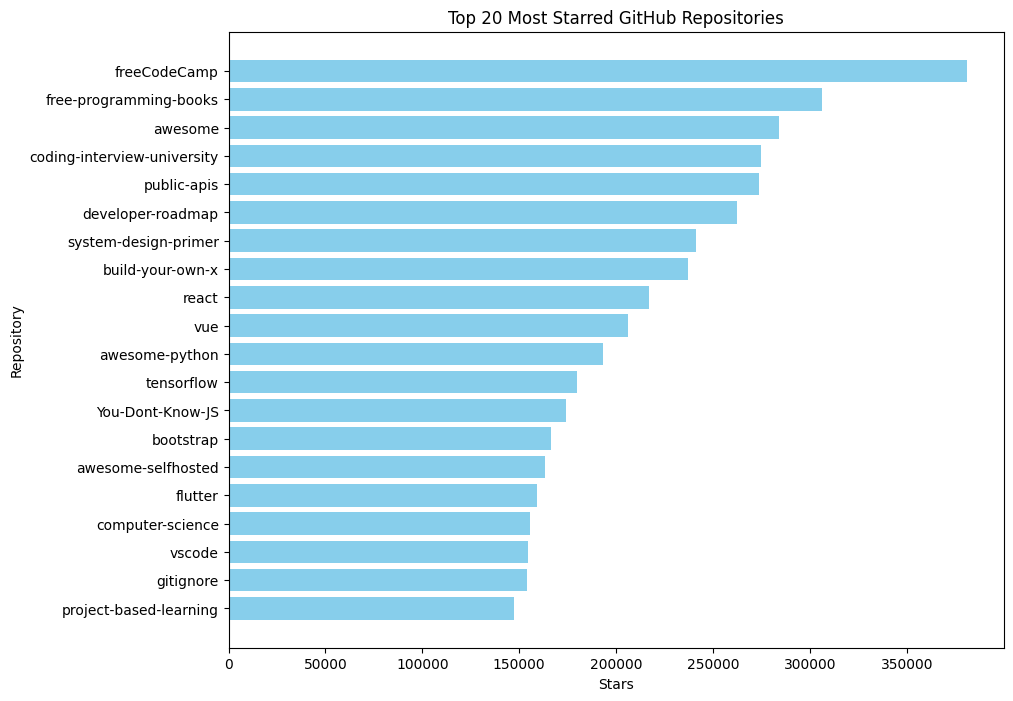

In [8]:

# most starred repositories in Github
import requests
import matplotlib.pyplot as plt

# Define the endpoint URL
url = "https://api.github.com/search/repositories"

# Set the parameters for the search
params = {
    "q": "stars:>1",
    "sort": "stars",
    "order": "desc",
    "per_page": 20  # Number of results per page
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract repository names and star counts
    repo_names = [repo['name'] for repo in data['items']]
    stars = [repo['stargazers_count'] for repo in data['items']]

    # Visualization
    plt.figure(figsize=(10, 8))
    plt.barh(repo_names, stars, color='skyblue')
    plt.xlabel('Stars')
    plt.ylabel('Repository')
    plt.title('Top 20 Most Starred GitHub Repositories')
    plt.gca().invert_yaxis()  # Invert y-axis to have the repo with most stars on top
    plt.show()

else:
    print(f"Failed to retrieve data: {response.status_code}")
